El formato de entrega será subir a u-cursos un Jupyter notebook laboratorio5.ipynb, que se debe ejecutar sin errores desde la primera celda a la última. Todo el código debe estar en el mismo notebook, el código debe estar comentado y el notebook debe estar escrito en forma de informe técnico, escribiendo una celda markdown antes de cada celda de código. **Recuerde escribir el nombre de todos los integrantes que trabajaron en la elaboración del entregable**.


---



**Integrantes**:
1. NN1
2. NN2
3. NN3

# LABORATORIO 5: CLASIFICACIÓN

OBJETIVOS:

1. COMPRENDER LAS NOCIONES BÁSICAS DE LAS LABORES DE CLASIFICACIÓN Y EL ROL DE LA INTERPRETABILIDAD DE LOS MODELOS.

2. COMPRENDER EL CONCEPTO DE CROSS-VALIDATION.

3. COMPRENDER EL CONCEPTO DE OVERFITTING.



---



## 1. CLASIFICACIÓN

In [0]:
class MachineLearning:
  # Estudia como aprender automáticamente a hacer predicciones certeras 
  # basado en observaciones del pasado.

    def Clasificador(data):
      # Asigna nuevos ejemplos a una determinada clase dentro de un conjunto predefinido
        clasificador = 'Un algoritmo que mediante la optimización de parámetros busca identificar patrones que distinguen a las diferentes clases'
        ejemplos = ['Decision Trees', 'Random Forest', 'Support Vector Machines',
                   'Redes Neuronales', 'Naive Bayes', 'Logit', 'etc.']
        return clasificador
    
    def Predictor(data):
      # Próximo laboratorio, pero mismos principios.
      predictor = '?'
      return predictor
 

[Tarea] Aprender del maestro: [
Siraj Raval
](https://www.youtube.com/watch?v=cAICT4Al5Ow)

### 1.1 Matriz de confusión

In [0]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://rasbt.github.io/mlxtend/user_guide/evaluate/confusion_matrix_files/confusion_matrix_1.png")

## 2. CROSS-VALIDATION

In [0]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://cdn-images-1.medium.com/max/800/1*J2B_bcbd1-s1kpWOu_FZrg.png")

## 3. OVERFITTING



In [0]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.03-validation-curve.png")

Ejemplo con código: [Notebook scikit-learn Underfitting vs. Overfitting](https://colab.research.google.com/drive/1bVRbyAXUm5-jlslwrUKuZqNRtYVFJ_I2)

## 4. EJEMPLOS

In [0]:
#Original: https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/
# load libraries
import pandas
import matplotlib.pyplot as plt
# load dataset diabetes
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
dataframe.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
#Get the target and the values in differents arrays
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

In [0]:
# libraries
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# prepare configuration for cross validation test harness
seed = 101
# prepare models
models = []
models.append(('LOGIT  ', LogisticRegression()))
models.append(('KNN    ', KNeighborsClassifier()))
models.append(('D_TREE ', DecisionTreeClassifier()))
models.append(('NB     ', GaussianNB()))
models.append(('SVM    ', SVC()))

In [0]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
print('Model    Accuracy (mean)   Accuracy (std)')
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s:   %f         %f" % (name, cv_results.mean(), cv_results.std())
	print(msg)

Model    Accuracy (mean)   Accuracy (std)
LOGIT  :   0.769515         0.048411
KNN    :   0.726555         0.061821
D_TREE :   0.700496         0.051750
NB     :   0.755178         0.042766
SVM    :   0.651025         0.072141


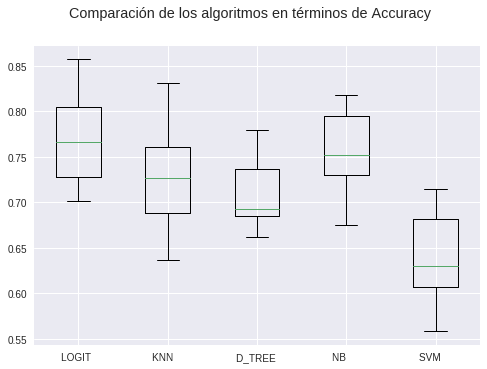

In [0]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Comparación de los algoritmos en términos de Accuracy')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [0]:
names

['LOGIT  ', 'KNN    ', 'D_TREE ', 'NB     ', 'SVM    ']

---
## 5. INVESTIGACIÓN (3 ptos)



### Métricas de desempeño (2 ptos)
5.1 Investigue las siguientes medidas de desempeño para los modelosde clasificación:

a) Accuracy \\
b) Precision \\
c) Recall \\
d) AUC \\
e) F-Measure


5.2  ¿Son equivalente los resultados de los modelos en términos de Accuracy y AUC? Utilice ejemplos prácticos para su respuesta.


### Selección de atributos (1 pto)

5.3 Elabore una tabla comparativa de los modelos de clasificación
utilizados en el laboratorio de acuerdo a los siguientes campos: 1) uso de recursos computacionales, 2) interpretabilidad y 3) overfitting.


---



## 6. LABORATORIO (3 ptos)

### Descripción
---
Recuerda el problema de los laboratorios 2 y 3? Si no lo recuerda,
a continuación un pequeño recordatorio: "Considere el problema
que enfrenta una entidad financiera que tiene altas tasas de
fuga voluntaria. Esta institución no tiene claro cuál es el perfil
característico que tienen los clientes fugitivos ni cuáles son las
razones por las cuales estos se fugan".

Con la ayuda de sus trabajos anteriores se eliminaron duplicidades,
imputaron valores perdidos, se escalaron los valores y restaron los
atributos que no contribuían al problema de clasificación (es decir,
el nuevo dataset está listo para que se apliquen los modelos de
clasificación).


### Datos
***
Se le entregarán 2 archivos: BASE y VALIDACION. En BASE se encuentra el conjunto de datos con los cuales se deben entrenar los modelos de clasificación y en VALIDACION el conjunto de datos sobre los cuales se aplicarán estos modelos. Ambos conjuntos poseen los mismos atributos, pero en VALIDACION no se tiene información sobre el atributo FUGA.

Variable | Descripción
------------- | -------------
1. ID | Identificador del cliente
2. Genero | Genero del cliente
3. Edad | Edad en años
4. NIV_Educ | Nivel educacional
5. E_Civil | Estado civil
6. COD Com | Código de la comuna
7. COD_Ofi | Código de la oficina 
8. Ciudad | Ciudad de la oficina
9. D_Marzo | Deuda de Marzo
10. D_Abril | Deuda de Abril 
11. D_Junio | Deuda de Junio 
12. D_Julio | Deuda de Julio 
13. D_Septiembre | Deuda de Septiembre
14. M_Moroso | Meses en Mora
15. Fuga | Variable objetivo


### Tareas:
***
Dada la información que ha sido presentada, se le pide que realice
las siguientes tareas:

a) **[2 ptos]** Implemente al menos 3 modelos de clasificación, reporte su desempeño y justifique la forma que ha seleccionado para evaluar su desempeño. Luego concluya qué modelo es mejor y porque.

b) **[1 pto]** Seleccione uno de los modelos y aplíquelo en la base de datos de VALIDACION. Debe entregar un archivo .xlsx con la predicción realizada.

In [0]:
#Guía completa : https://colab.research.google.com/drive/1SU176zTQvhflodEzuiacNrzxFQ6fWeWC#scrollTo=42Dvi-sgxNqz
#!pip install -U -q PyDrive

#LINKS:
#Muestra  :  https://drive.google.com/open?id=1AsH3DfyWRwT8Z_Z2azdznQOP3q8FZcq2
#Completa :  https://drive.google.com/open?id=1ZA0PCWnb3A729AsUPNcJf1hLhRFeQR8C

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


file_id_base = '1dTcwh3gzaS3d1xvgAt5WoLKn1XNFCb07'
downloaded = drive.CreateFile({'id': file_id_base})
downloaded.GetContentFile('exported.xlsx')

In [0]:
!pip install -q xlrd
import pandas as pd
BASE = pd.read_excel('exported.xlsx')
BASE.head()

,ID,EDAD,D_Marzo,D_Abril,D_Junio,D_Julio,D_Septiembre,GENERO,NIV_EDUC,E_CIVIL,CIUDAD,COD_OFI,COD_COM,M_MOROSO,FUGA
0,1,-0.568484,-0.307375,-0.582753,0.363883,1.114329,-0.162347,M,MED,CAS,LOS ANGELES,68,213,2,NO FUGA
1,2,0.670478,-0.307375,-0.677883,-0.283533,-0.482521,-0.196777,F,MED,VIU,SANTIAGO,16,89,1,NO FUGA
2,3,-0.568484,-0.307375,0.823079,-0.283533,-0.226914,0.099424,M,TEC,CAS,ANTOFAGASTA,90,16,1,NO FUGA
3,4,-0.940173,-0.307375,-0.665151,0.013077,-0.439765,-0.186144,F,UNV,CAS,SANTIAGO,85,115,1,NO FUGA
4,5,0.050997,-0.307375,-0.648206,-0.173296,-0.388644,-0.169233,M,TEC,CAS,SANTIAGO,45,80,1,NO FUGA
